## **여러 전략을 동시에 처리하는 Backtesting Infra**

1. **Backtesting infra**
    - **(1) 데이터 제공**
        - 시간에 따라서 데이터를 제공함.
        - 데이터는 종류는 하나 일 수도, 여러개 일 수도 있음.
    
    - **(2) 진입 관리**
        - 진입 가는 전략의 수량 결정.
        - 진입시 전략에 할당되는 금액 결정.
    
    - **(3) 전체 자금 관리**
        - 현 시점의 전체 자금 관리.
        - 오픈된 포지션 관리. (자금대비 포지션 비율 계산)
    
    - **(4) 청산 관리**
        - 포지션 청산시 정보 업데이트.

    - **(5) 정보 저장**
        - 자금 정보 저장.
        - 전체 자산(레버지리를 넣었다면 빌린 금액 제외)
        - 포지션 크기
        - 전체 자산 대비 포지션 사이즈 비율
        - 

    - 전체 전략 필요 정보 저장. 


2. Strategy Manager
    - 조건에 따라서 진입, 청산을 결정하는 역할.
    - 포지션이 오픈 되었을 때 생성, 포지션이 종료되면 제거되고 관련 정보를 Backtesing infra에 전달.
    (공통)
    - 진입시 정보 업데이트 - Backtesting Infra에 필요 정보 전달.
    - 청산시 정보 업데이트 - Backtesting Infra에 필요 정보 전달. 


    (개별)
    - 진입 조건을 설정.
    - 청산 조건을 설정.
    - 리스크 관리 조건을 설정.
        - 1차 익절, 손절 조건.
    - 진입 자금은 BackTesting Infra로 부터 전달 받음.
    - 전략별 필요 정보 저장.

    

In [1]:
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
from typing import Dict, List
from enum import Enum
from collections import defaultdict
from data.loader import load_price_data
from backtester import Backtesting
from utils import Side, Status
from strategy.base import StrategyManager
from preprocessor import Preprocessor

In [2]:
# 데이터 로드
df_eth = load_price_data(market='crypto'
                     , symbol='eth'
                     , timeframe='15m'
                     , start_date='2020-01-01'
                     , end_date='2024-07-07'
                     , save_name='eth.csv')

2024-07-07 16:24:54.481 | INFO     | data.loader:load_price_data:34 - c:\Users\user\Desktop\github\street_fighter\data\crypto\15m\eth.csv
2024-07-07 16:24:54.484 | INFO     | data.loader:load_price_data:37 - Data already exist!!, Load Data from : c:\Users\user\Desktop\github\street_fighter\data\crypto\15m\eth.csv


### **데이터 준비 부분 만들기**


* Data Preprocessor Class 생성.


* StrategyManager에 ready_data 메서드 추가 - 필요한 컬럼명 정의

* BackTesting에서 read_data columns 추가.
    - Data Preprocessor Class에서 해당 컬럼 데이터 추가.




In [ ]:
from typing import Tuple
from utils import Side, Status

class RsiBBGanLongStrategy(StrategyManager):
    def __init__(self, asset, strategy_name, trading_fee=0.045):
        super().__init__(asset, strategy_name, trading_fee)
    
    def need_columns(self):
        return ['RSI', 'BBLower', 'PANGLE_MA1920_100']
    
    def open_condition(self, check_data: pd.Series) -> Tuple[bool, str, float]:
        """포지션 진입 조건
            - 종가 < BB 하단
        """
    

### **전략 class**

In [10]:
from strategy.moving_average import PartialCloseMovingAverageStrategy


strategy_list = [
    {'object': PartialCloseMovingAverageStrategy, 'parameter': {'asset': 'ETHUSDT'
                                                          , 'strategy_name': 'simple_sma1'
                                                          , 'trading_fee': 0.045}}
    , {'object': PartialCloseMovingAverageStrategy, 'parameter': {'asset': 'ETHUSDT'
                                                          , 'strategy_name': 'simple_sma2'
                                                          , 'trading_fee': 0.045}}
    , {'object': PartialCloseMovingAverageStrategy, 'parameter': {'asset': 'ETHUSDT'
                                                          , 'strategy_name': 'simple_sma3'
                                                          , 'trading_fee': 0.045}}
    ]

datalist = [
    {'ETHUSDT': df_eth.iloc[10000:, :]}
]

backtester = Backtesting(strategy_list=strategy_list, max_strategy_cnt=9)
backtester.run(datalist)


c:\Users\user\Desktop\github\street_fighter\backtester.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asset[column] = self.preprocessor.make_column(column, df_asset)
c:\Users\user\Desktop\github\street_fighter\backtester.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asset[column] = self.preprocessor.make_column(column, df_asset)


100%|██████████| 148305/148305 [02:30<00:00, 982.41it/s] 


In [11]:
backtester.strategy_in_mangement

{'total': 0, 'simple_sma1': 0, 'simple_sma2': 0, 'simple_sma3': 0}

In [12]:
df_strategy_clear_info = pd.DataFrame(backtester.strategy_clear_info)

In [13]:
df_strategy_clear_info

,strategy_name,close_count,clear,close_size,side,close_price,enter_price,initial_balance,realized_now_amount,realized_total_amount,pnl(%)
0,simple_sma1,1,False,3.554866,SELL,157.38,156.21,1111.111111,550.898347,550.898347,-0.743424
1,simple_sma2,1,False,3.554866,SELL,157.38,156.21,1111.111111,550.898347,550.898347,-0.743424
2,simple_sma3,1,False,3.554866,SELL,157.38,156.21,1111.111111,550.898347,550.898347,-0.743424
3,simple_sma1,1,False,3.552591,SELL,157.38,156.31,1111.111111,551.256106,551.256106,-0.679883
4,simple_sma2,1,False,3.552591,SELL,157.38,156.31,1111.111111,551.256106,551.256106,-0.679883
...,...,...,...,...,...,...,...,...,...,...,...
69525,simple_sma1,2,True,0.003266,BUY,1676.20,1703.86,11.134997,5.472189,10.940493,-1.623373
69526,simple_sma1,1,False,0.003314,SELL,1677.03,1676.20,11.113385,5.548944,5.548944,-0.049492
69527,simple_sma1,2,True,0.003314,SELL,1675.25,1676.20,11.113385,5.554839,11.103783,0.056708
69528,simple_sma1,1,False,0.003315,BUY,1665.19,1675.25,11.112318,5.517825,5.517825,-0.600507


In [14]:
df_backtesting_info = pd.DataFrame(backtester.backtesting_info)
df_backtesting_info

,Date,total_balance,enter_balacne,remain_balance,entered_strategy_cnt
0,2020-04-14 04:00:00,10000.000000,0.0,10000.000000,0
1,2020-04-14 04:15:00,10000.000000,0.0,10000.000000,0
2,2020-04-14 04:30:00,10000.000000,0.0,10000.000000,0
3,2020-04-14 04:45:00,10000.000000,0.0,10000.000000,0
4,2020-04-14 05:00:00,10000.000000,0.0,10000.000000,0
...,...,...,...,...,...
148300,2024-07-06 23:00:00,99.944037,0.0,99.944037,0
148301,2024-07-06 23:15:00,99.944037,0.0,99.944037,0
148302,2024-07-06 23:30:00,99.944037,0.0,99.944037,0
148303,2024-07-06 23:45:00,99.944037,0.0,99.944037,0


<AxesSubplot: >

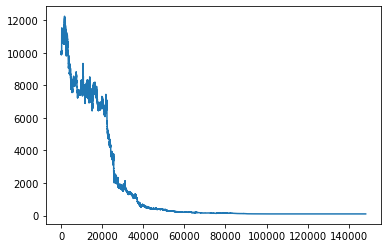

In [15]:
df_backtesting_info.total_balance.plot()